In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Labels

In [2]:
data_aqi = pd.read_csv('aqi/Labels.csv')
path_out = 'figure/'
#设置索引变量
data_aqi['datetime'] = pd.to_datetime(data_aqi['datetime'])
data_aqi = data_aqi.set_index('datetime')

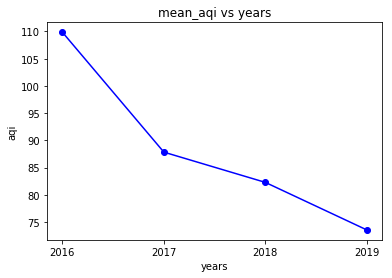

In [3]:
def year_mean(var):
    '''
    求某变量的年平均值并画图
    return: list
    '''
    years = ['2016', '2017', '2018', '2019']
    mean_years = [data_aqi[y][var].mean() for y in years]
    
    fn = 'mean_'+ var +' vs years'
    plt.plot(years,mean_years,'b-o')
    plt.xlabel('years')
    plt.ylabel(var)
    plt.title(fn)
    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return mean_years

aqi_year = year_mean('aqi')

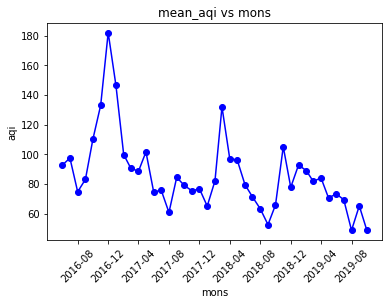

In [4]:
def mon_mean(var):
    '''
    求某变量的月平均值并画图
    return: list
    '''
    mean_mons = data_aqi[var].resample('MS').mean()
    fn = 'mean_'+ var +' vs mons'
    plt.plot(mean_mons.index,mean_mons,'b-o')
    plt.xlabel('mons')
    plt.ylabel(var)
    plt.title(fn)
    # 刻度 文字
    
    for label in plt.gca().xaxis.get_ticklabels():
        label.set_rotation(45)

    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return mean_mons.values.tolist()

aqi_mon = mon_mean('aqi')

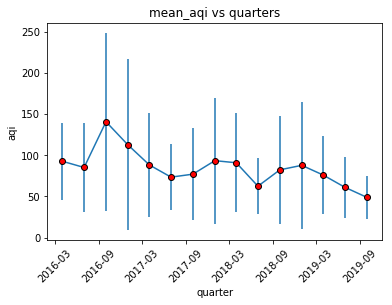

In [104]:
def quarter_mean(var):
    '''
    求某变量的季节平均值并画图
    return: list
    '''
    mean_quarter = data_aqi[var].resample('QS').mean()
    std_quarter = data_aqi[var].resample('QS').std()
    fn = 'mean_'+ var +' vs quarters'
#     plt.plot(mean_quarter.index,mean_quarter,'b-o')
#     plt.plot(mean_quarter.index,std_quarter,'r-o')
    plt.errorbar(mean_quarter.index,mean_quarter,std_quarter, marker='o', mfc='r', mec='k')
    plt.xlabel('quarter')
    plt.ylabel(var)
    plt.title(fn)
    for label in plt.gca().xaxis.get_ticklabels():
        label.set_rotation(45)
#     plt.legend()
    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return mean_quarter.values.tolist()

aqi_quarter = quarter_mean('aqi')

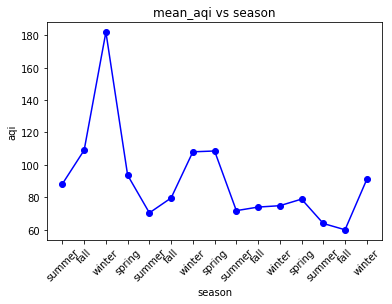

In [10]:
def season_mean(var):
    '''
    按季节划分,观察变化趋势
    return:list
    '''
    years = ('2016','2017','2018','2019')
    seasons = ('spring','summer','fall','winter')
    season_mean = []
    season_label = []
    
    for y in years:
        for s in seasons:
            ME = data_aqi[y][data_aqi[y]['season'] == s][var].mean()
            if not pd.isna(ME):
                season_mean.append(ME)
                season_label.append(s)
                
    fn = 'mean_' + var + ' vs season'

    plt.xticks(range(len(season_label)),season_label)
    plt.plot(season_mean, 'b-o')
    for label in plt.gca().xaxis.get_ticklabels():
        label.set_rotation(45)
    plt.xlabel('season')
    plt.ylabel(var)
    plt.title(fn)
    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    
    return season_mean

aqi_season = season_mean('aqi')

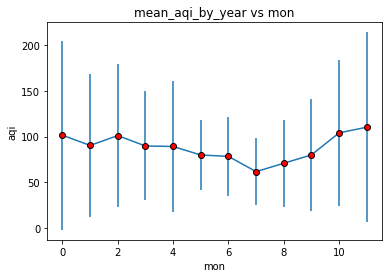

In [6]:
data_aqi['month'] = data_aqi.index.month
def mon_year_mean(var):
    '''
    一年中每个月平均
    return:list
    '''
    mean_mon_year = [data_aqi[data_aqi['month'] == m][var].mean() for m in range(1,13)]
    std_mon_year = [data_aqi[data_aqi['month'] == m][var].std() for m in range(1,13)]
    fn = 'mean_'+ var +'_by_year vs mon'
    plt.errorbar(range(len(mean_mon_year)), mean_mon_year, std_mon_year, marker='o', mfc='r', mec='k')
    plt.xlabel('mon')
    plt.ylabel(var)
    plt.title(fn)
    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return mean_mon_year

aqi_mon_by_year = mon_year_mean('aqi')

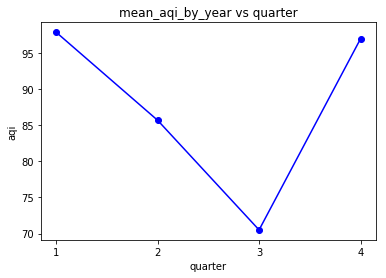

In [7]:
data_aqi['quarter'] = data_aqi.index.quarter
def quarter_year_mean(var):
    '''
    一年中每个季节平均
    return:list
    '''
    mean_quarter_year = [data_aqi[data_aqi['quarter'] == m][var].mean() for m in range(1,5)]
    fn = 'mean_'+ var +'_by_year vs quarter'
    plt.plot(['1','2','3','4'],mean_quarter_year,'b-o')
    plt.xlabel('quarter')
    plt.ylabel(var)
    plt.title(fn)
    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return mean_quarter_year

aqi_quarter_by_year = quarter_year_mean('aqi')

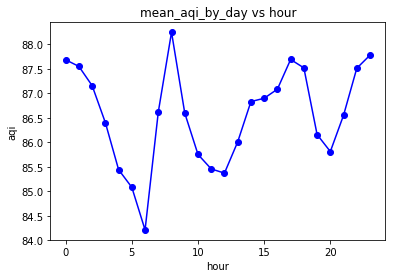

In [8]:
data_aqi['hour'] = data_aqi.index.hour
def hour_day_mean(var):
    '''
    一天中每小时平均
    return:list
    '''
    mean_hour_day = [data_aqi[data_aqi['hour'] == m][var].mean() for m in range(24)]
    fn = 'mean_'+ var +'_by_day vs hour'
    plt.plot(range(24),mean_hour_day,'b-o')
    plt.xlabel('hour')
    plt.ylabel(var)
    plt.title(fn)
    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return mean_hour_day

aqi_hour_by_day = hour_day_mean('aqi')

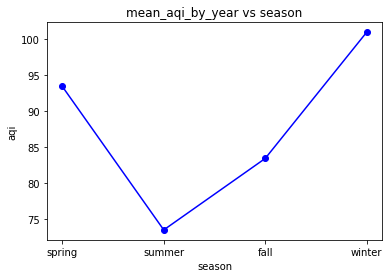

In [9]:
def season_mean_by_year(var):
    '''
    按季节划分,观察变化趋势
    return:list
    '''
    season = {'spring':[3,4,5],'summer':[6,7,8],'fall':[9,10,11],'winter':[12,1,2]}
    mon_season = {}
    #月份对应季节
    for key in season:
        for mon in season[key]:
            mon_season[mon] = key
    data_aqi['season'] = data_aqi['month'].apply(lambda x: mon_season[x])
    mean_season = [data_aqi[data_aqi['season'] == s][var].mean() for s in season.keys()]
#     print(mean_season)
#     print(season.keys())
    
    fn = 'mean_'+ var +'_by_year vs season'
    plt.xticks(range(len(season.keys())),season.keys())
    plt.plot(mean_season, 'b-o')
    plt.xlabel('season')
    plt.ylabel(var)
    plt.title(fn)
    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return mean_season

aqi_season_by_year = season_mean_by_year('aqi')

## Features

In [11]:
data_features = pd.read_csv('aqi/Features.csv',index_col= 0)
data_features.index = pd.to_datetime(data_features.index)

## Time match

In [12]:
idx_features = data_features.index.isin(data_aqi.index)
idx_aqi = data_aqi.index.isin(data_features.index)
data_all = pd.concat([data_aqi[idx_aqi],data_features[idx_features]],axis=1)

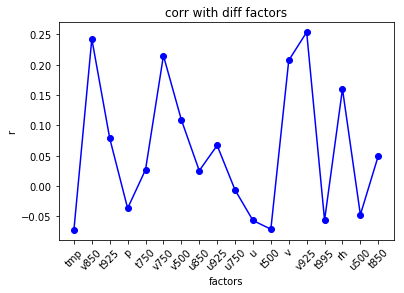

In [56]:
def corr_xy():
    '''
    求aqi与各个变量的相关性系数
    return: list
    '''
    corr = []
    xs = data_all.columns.values[11:]
    for x in xs:
        corr.append(data_all['aqi'].corr(data_all[x]))
    
    fn = 'corr with diff factors'

    plt.xticks(range(len(xs)),xs)
    plt.plot(corr, 'b-o')
    for label in plt.gca().xaxis.get_ticklabels():
        label.set_rotation(45)
        
    plt.xlabel('factors')
    plt.ylabel('r')
    plt.title(fn)
    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    
    return corr

corrs = corr_xy()

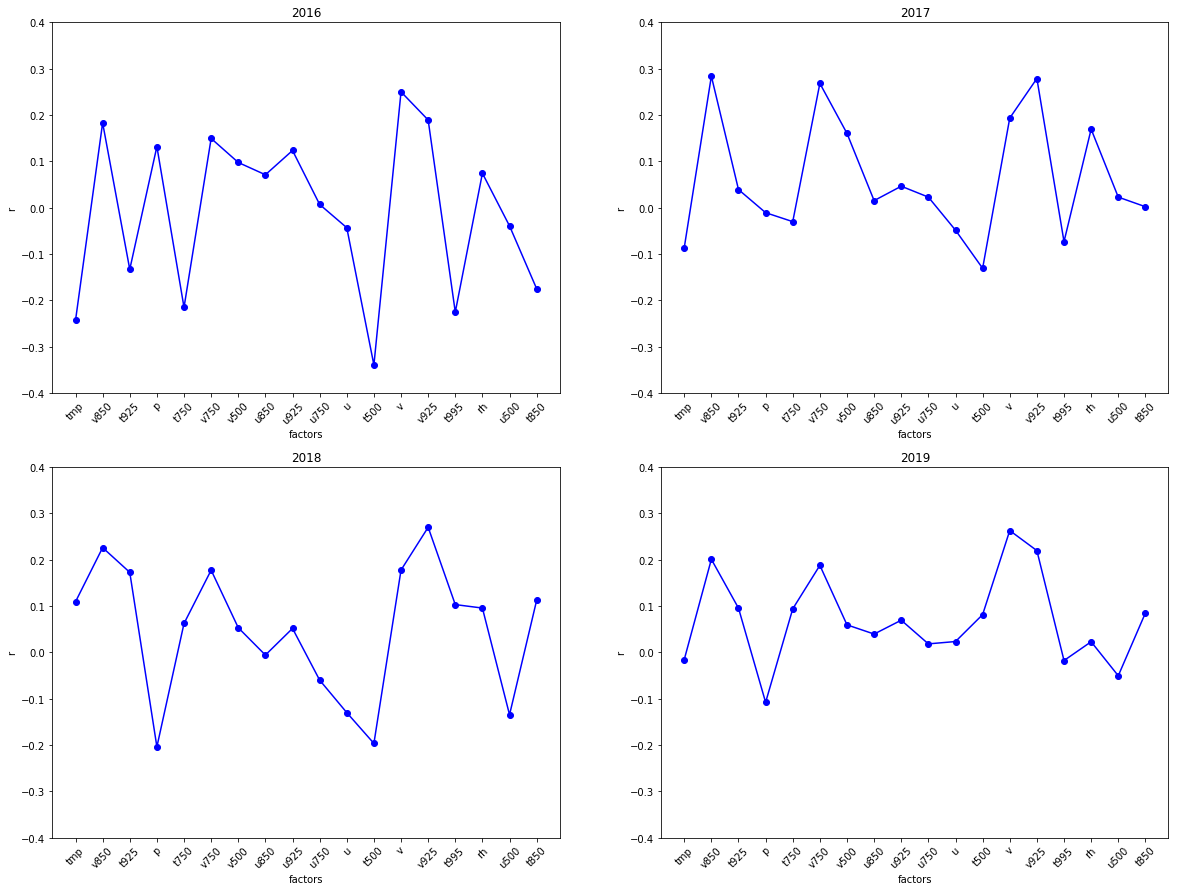

In [77]:
def corr_xy_difyear():
    '''
    求aqi与各个变量的相关性系数
    return: list
    '''
    corr = {'2016':[],'2017':[],'2018':[],'2019':[]}
    xs = data_all.columns.values[11:]
    
    for y in corr.keys():
        for x in xs:
            corr[y].append(data_all[y]['aqi'].corr(data_all[y][x]))
    
    fn = 'corr with diff factors by year'
    fig,axs = plt.subplots(2,2,figsize= (20,15))
    
    for i,y in enumerate(corr.keys()): 
        row =  i//2
        col =  i%2
        axs[row,col].set_xticks(range(len(xs)))
        axs[row,col].set_xticklabels(xs)
        axs[row,col].plot(corr[y], 'b-o')
        axs[row,col].set_xlabel('factors')
        axs[row,col].set_ylabel('r')
        axs[row,col].set_title(y)
        axs[row,col].set_ylim(-0.4,0.4)
        for label in axs[row,col].get_xticklabels():
            label.set_rotation(45)

    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return corr

corrs = corr_xy_difyear()

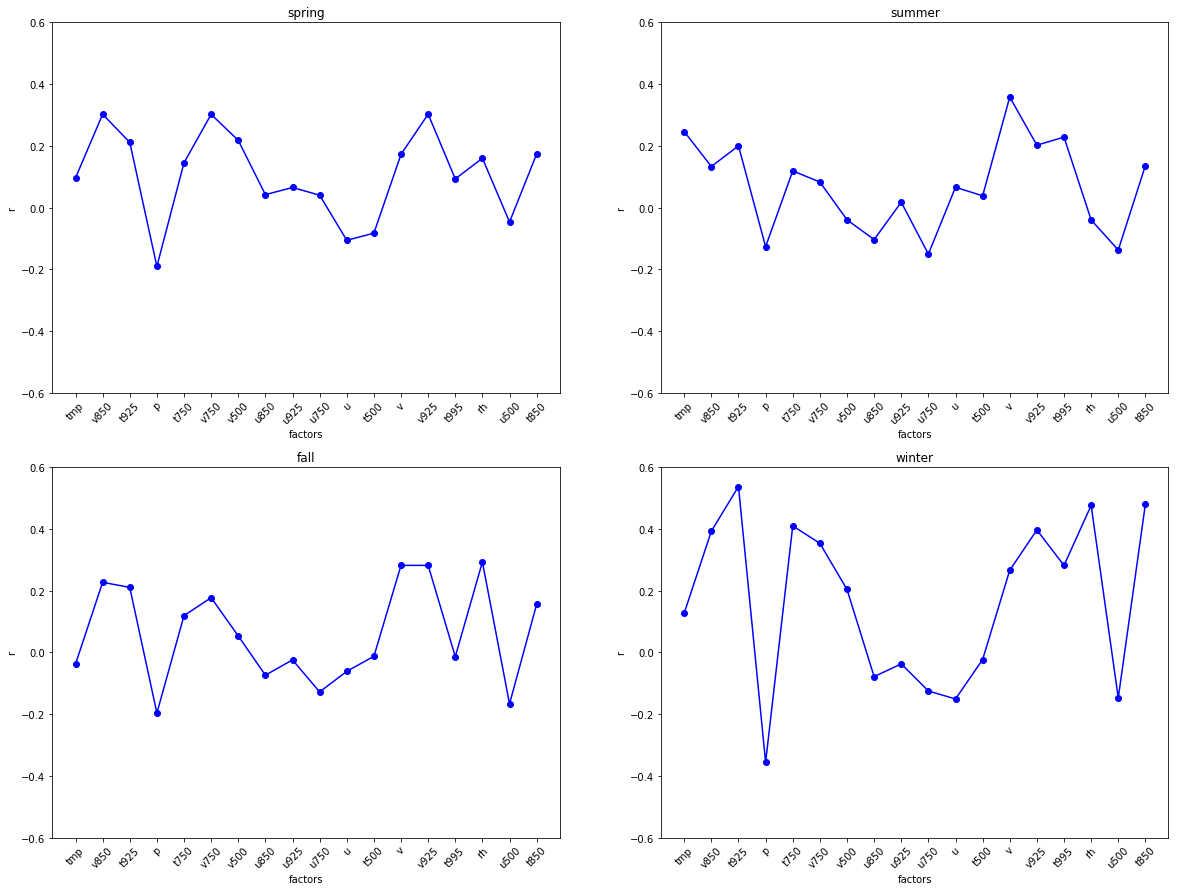

In [76]:
def corr_xy_difseason():
    '''
    求aqi与各个变量的相关性系数
    return: list
    '''
    corr = {'spring':[],'summer':[],'fall':[],'winter':[]}
    xs = data_all.columns.values[11:]
    
    for s in corr.keys():
        for x in xs:
            corr[s].append(data_all[data_all['season'] == s]['aqi'].corr(data_all[data_all['season'] == s][x]))
    
    fn = 'corr with diff factors by season'
    fig,axs = plt.subplots(2,2,figsize= (20,15))
    
    for i,s in enumerate(corr.keys()): 
        row =  i//2
        col =  i%2
        axs[row,col].set_xticks(range(len(xs)))
        axs[row,col].set_xticklabels(xs)
        axs[row,col].plot(corr[s], 'b-o')
        axs[row,col].set_xlabel('factors')
        axs[row,col].set_ylabel('r')
        axs[row,col].set_title(s)
        axs[row,col].set_ylim(-0.6,0.6)
        for label in axs[row,col].get_xticklabels():
            label.set_rotation(45)

    plt.savefig(path_out + fn + '.jpg')
    plt.show()
    return corr

corrs = corr_xy_difseason()

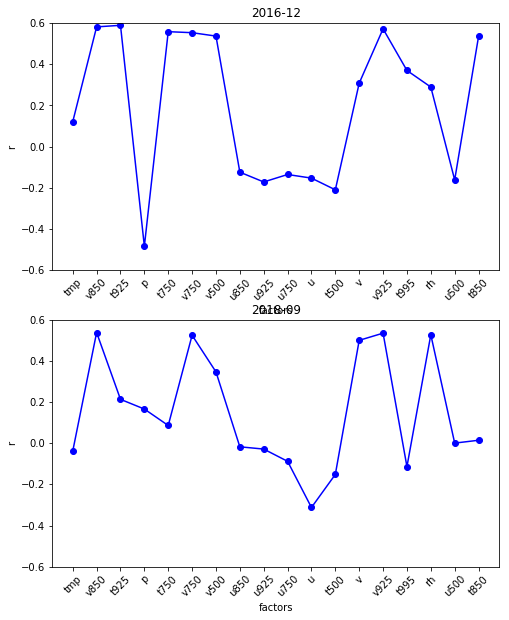

In [95]:
def maxmin_aqi_mon():
    '''
    aqi指数最大月份与最小月份，污染因子与aqi的相关性
    return: None
    '''
    xs = data_all.columns.values[11:]
    
    fig,axs = plt.subplots(2,1,figsize= (8,10))
    fn = 'corr with diff factors maxmin mon'
    
    corr = []
    for x in xs:
        corr.append(data_all['2016-12']['aqi'].corr(data_all['2016-12'][x]))
    axs[0].set_xticks(range(len(xs)))
    axs[0].set_xticklabels(xs)
    axs[0].plot(corr, 'b-o')
    axs[0].set_xlabel('factors')
    axs[0].set_ylabel('r')
    axs[0].set_title('2016-12')
    axs[0].set_ylim(-0.6,0.6)
    for label in axs[0].get_xticklabels():
        label.set_rotation(45)

    corr = []
    for x in xs:
        corr.append(data_all['2018-09']['aqi'].corr(data_all['2018-09'][x]))
    axs[1].set_xticks(range(len(xs)))
    axs[1].set_xticklabels(xs)
    axs[1].plot(corr, 'b-o')
    axs[1].set_xlabel('factors')
    axs[1].set_ylabel('r')
    axs[1].set_title('2018-09')
    axs[1].set_ylim(-0.6,0.6)
    for label in axs[1].get_xticklabels():
        label.set_rotation(45)
    
    plt.savefig(path_out + fn + '.jpg')
    plt.show()

maxmin_aqi_mon()

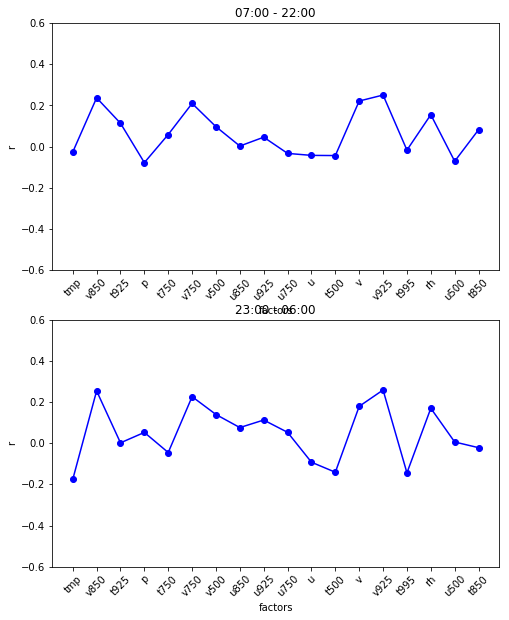

In [103]:
def maxmin_aqi_mn(t1,t2,t3,t4):
    '''
    aqi指数不同时间段内，污染因子与aqi的相关性
    param t1:str,第一个时段起
    param t2:str,第一个时段末
    param t3:str,第二个时段起
    param t4:str,第二个时段末
    return: None
    '''
    xs = data_all.columns.values[11:]
    
    fig,axs = plt.subplots(2,1,figsize= (8,10))
    fn = 'corr with diff factors between time'
    
    corr = []
    for x in xs:
        corr.append(data_all.between_time(t1,t2)['aqi'].corr(data_all.between_time(t1,t2)[x]))
    axs[0].set_xticks(range(len(xs)))
    axs[0].set_xticklabels(xs)
    axs[0].plot(corr, 'b-o')
    axs[0].set_xlabel('factors')
    axs[0].set_ylabel('r')
    axs[0].set_title(t1 + ' - ' + t2)
    axs[0].set_ylim(-0.6,0.6)
    for label in axs[0].get_xticklabels():
        label.set_rotation(45)

    corr = []
    for x in xs:
        corr.append(data_all.between_time(t3,t4)['aqi'].corr(data_all.between_time(t3,t4)[x]))
    axs[1].set_xticks(range(len(xs)))
    axs[1].set_xticklabels(xs)
    axs[1].plot(corr, 'b-o')
    axs[1].set_xlabel('factors')
    axs[1].set_ylabel('r')
    axs[1].set_title(t3 +' - '+ t4)
    axs[1].set_ylim(-0.6,0.6)
    for label in axs[1].get_xticklabels():
        label.set_rotation(45)
    
    plt.savefig(path_out + fn + '.jpg')
    plt.show()

maxmin_aqi_mn('07:00','22:00','23:00','06:00')

In [107]:
data_all.to_csv('aqi/aqi_all.csv')